<a href="https://colab.research.google.com/github/AnantasiiaAleks/A-B_tests/blob/main/Aleksandrovskaya_6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В решении использовался [Онлайн-калькулятор Sample Size Calculator (Evan's Awesome A/B Tools)](https://www.evanmiller.org/ab-testing/sample-size.html)

In [1]:
import numpy as np
import scipy.stats as sps

In [31]:
def testing_volume(p0, pa, alpha=0.05, beta=0.05):
  za = sps.norm.ppf(1 - alpha)
  zb = sps.norm.ppf(1 - beta)
  n = (((np.sqrt(p0 * (1 - p0)) * za) + (np.sqrt(pa * (1 - pa)) * zb)) / (pa - p0))**2
  return n

— Вы работаете с рассылкой предложений перед “черной пятницей”, доля открываемых писем, исходя из заголовка письма в рассылках, обычно составляет 15% (конверсия). Вам хочется увеличить конверсию открываемых писем до 25% с помощью смайликов. Рассчитайте необходимый размер выборки. Сделай вывод. (В вашей базе рассылок около 40000 человек)

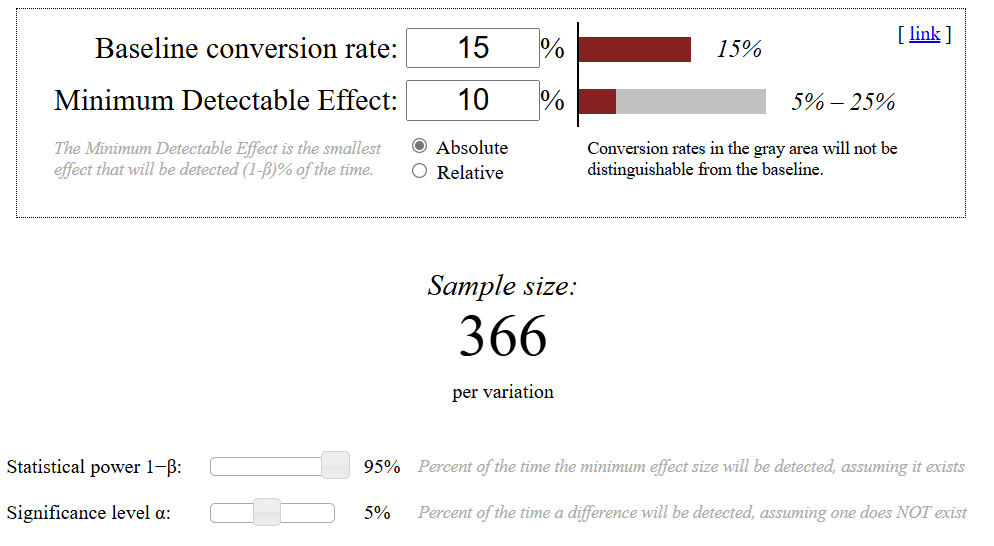

In [32]:
p0 = 15 / 100
pa = 25 / 100
N = 40_000
n = testing_volume(p0, pa)
print(f'Размер выборки, необходимый для проведения тестирования с параметрами альфа=5% и бета=95% составляет не менее {np.ceil(n).astype(int)} адресатов.')

Размер выборки, необходимый для проведения тестирования с параметрами альфа=5% и бета=95% составляет не менее 169 адресатов.


Расчетный результат ниже, чем предлагает онлайн-калькулятор. Для надежности следует взять большую выборку

— И вот вы теперь тестируете две версии рассылок. И заметили, что в одной версии конверсия 19%, а в другой 24%. Всего у вас 100 человек в рассылке. Является ли результат статистически значимым? Если нет, то сколько должно было человек, чтобы результат был уже статистически значим?

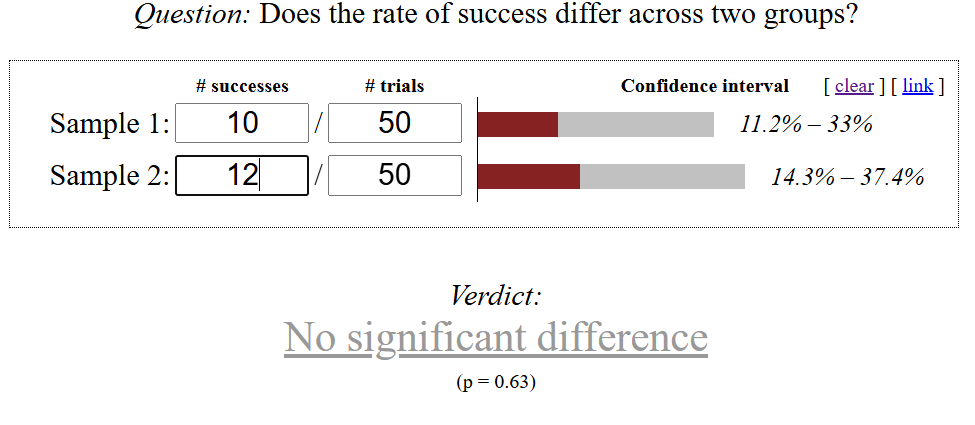

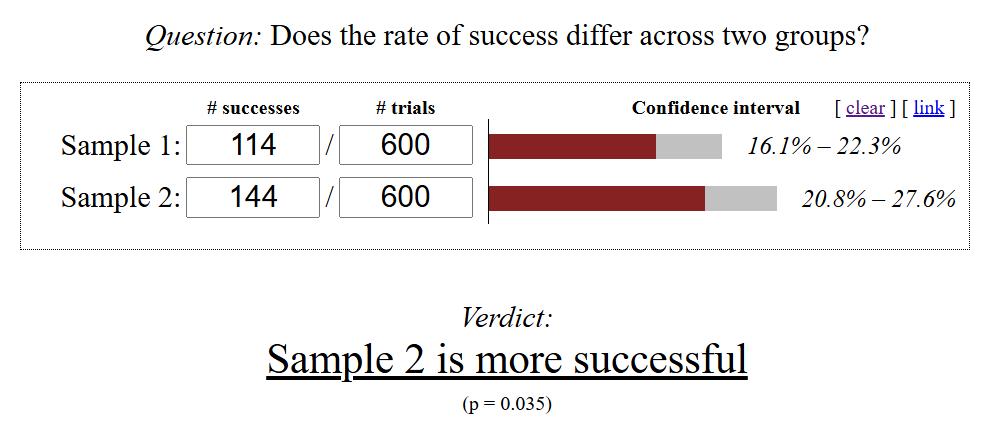

Онлайн-калькулятор сообщает, что результаты по выборкам не являются статистически значимым. Путем перебора значений установлено, что для того чтобы получить статистически значимые различия необходимы минимальные выборки для обеих версий рассылок был не менее 600 человек.

In [18]:
alpha = 0.05
# Размеры выборок: общее количество 100 чел. делим пополам
n1 = 50
n2 = 50
# Результаты тестирования
conv1 = 19 / 100
conv2 = 24 / 100

# Доли для каждой выборки
p1 = np.ceil(conv1 * n1).astype(int)
p2 = np.ceil(conv2 * n2).astype(int)

# Расчитываем общее значение доли
p = (p1 + p2) / (n1 + n2)

# Расчитываем стандартную ошибку (SE):
SE = np.sqrt((p * (1 - p)) / (1/n1 + 1/n2))

# Получение наблюдаемого Z-значения
z_n = (p2 - p1) / SE

z_crit = abs(sps.norm.ppf(alpha/2))

if z_n < z_crit:
  print(f'{z_n= :.3f}, разница не является статистически значимой')
else:
  print(f'{z_n= :.3f}, различия в результатах статистически значимы')


# Расчет минимальной выборки для статистически значимого результата
n_need = testing_volume(conv1, conv2)
print(f'Размер выборки, необходимый для проведения тестирования с параметрами альфа=5% и бета=95% составляет не менее {np.ceil(n).astype(int)} адресатов.')

z_n= 0.966, разница не является статистически значимой
Размер выборки, необходимый для проведения тестирования с параметрами альфа=5% и бета=95% составляет не менее 727 адресатов.


Расчеты указывают на большее значение, чем предлагает онлайн-калькулятор. Рекомендуется брать большее значение величины выборки, чтобы результаты тестирования были надежнее.

— Вас повысили до старшего аналитика. Ваша первая задача на новой позиции, определить какой поставщик товаров (A или B) позволяет вам получить наибольшую оценку качества. У вас две группы оценок для A и B. Среднее группы A = 45, дисперсия группы A = 4, средние группы B = 40, дисперсия группы B = 3. Является ли группа А лучшей, если опираться на статистическую значимость? А если бы обе дисперсии были равны 1?

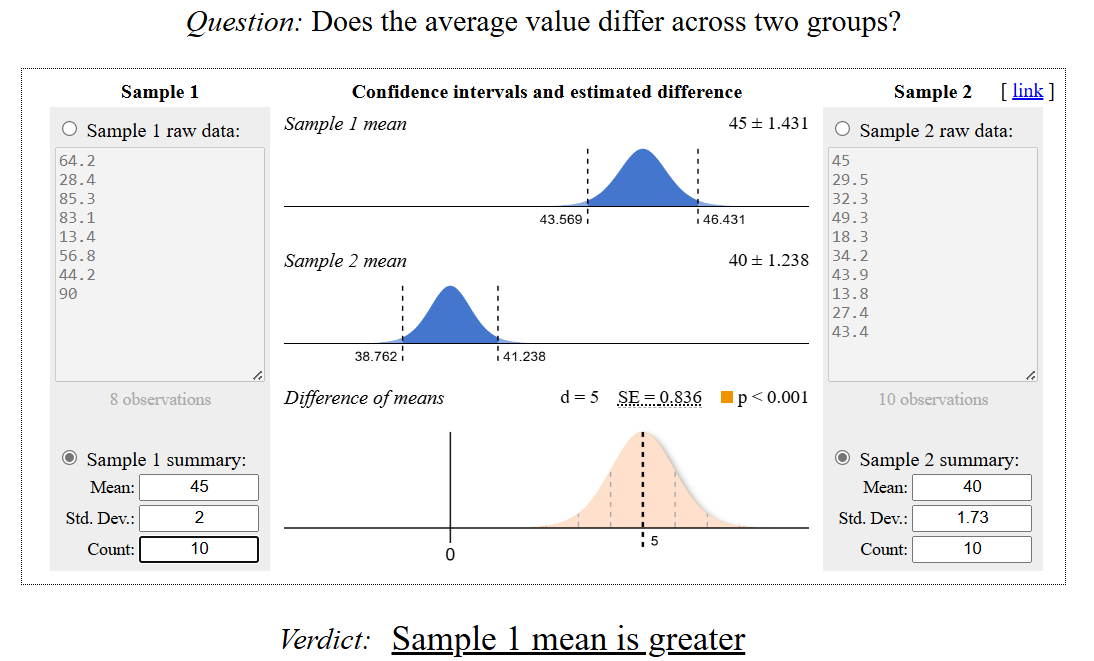

In [10]:
# Для определения, является ли группа A статистически лучше группы B, мы можем использовать метод t-теста для независимых выборок, чтобы сравнить два средних значения.

def whoisbetter(mean1, mean2, d1, d2, n1, n2, alpha=0.05):
  t_n = (mean1 - mean2) / np.sqrt((d1/n1) + (d2/n2))
  df = n1 + n2 - 2
  t_crit = sps.t.ppf(1-alpha/2, df)
  if t_n < t_crit:
    print(f'{t_n:.3f} < {t_crit:.3f} -> Статистически значимых различий между группами не обнаружено')
  else:
    print(f'{t_n:.3f} > {t_crit:.3f} -> Разница между группами статистически значима. Группа с более высоким средним значением лучше, чем группа с более низким средним значением.')

In [22]:
# - Среднее группы A
M1 = 45
# - Среднее группы B
M2 = 40

# 1. Когда дисперсии разные:
D1 = 4
D2 = 3

n1 = n2 = 3

whoisbetter(M1, M2, D1, D2, n1, n2)
# При выборке не меньше 3х - статистически значимые отличия есть, чем больше выборки, тем явнее различия.

# 1. Когда дисперсии равны:
D3 = 1
D4 = 1

n3 = n4 = 2

whoisbetter(M1, M2, D3, D4, n3, n4)

# Для групп с дисперсией, равной 1 размер выборки не имеет значения, Группа с более высоким средним значением статистически лучше, чем группа с более низким средним значением.

# В обоих случаях, несмотря на разные дисперсии, группа A показала статистически значимое преимущество по сравнению с группой B.

3.273 > 2.776 -> Разница между группами статистически значима. Группа с более высоким средним значением лучше, чем группа с более низким средним значением.
5.000 > 4.303 -> Разница между группами статистически значима. Группа с более высоким средним значением лучше, чем группа с более низким средним значением.


Рассчетные данные совпадают с вердиктом онлайн-калькулятора

— Вы планируете эксперимент по способам расстановки продуктов на полке. Вы предполагаете, что некоторые пары продуктов надо класть вместе. В качестве метрики у вас средний чек покупок. Вы проводите эксперимент в 1000 магазинах. Средний чек в группе A = 870 рублей, дисперсия этого чека - 80 рублей. Какое минимальное значение метрики надо получить для группы B, чтобы после всей 1000 экспериментов с каждым магазином мы могли с уверенностью сказать, что тестируемая гипотеза в группе B верна?

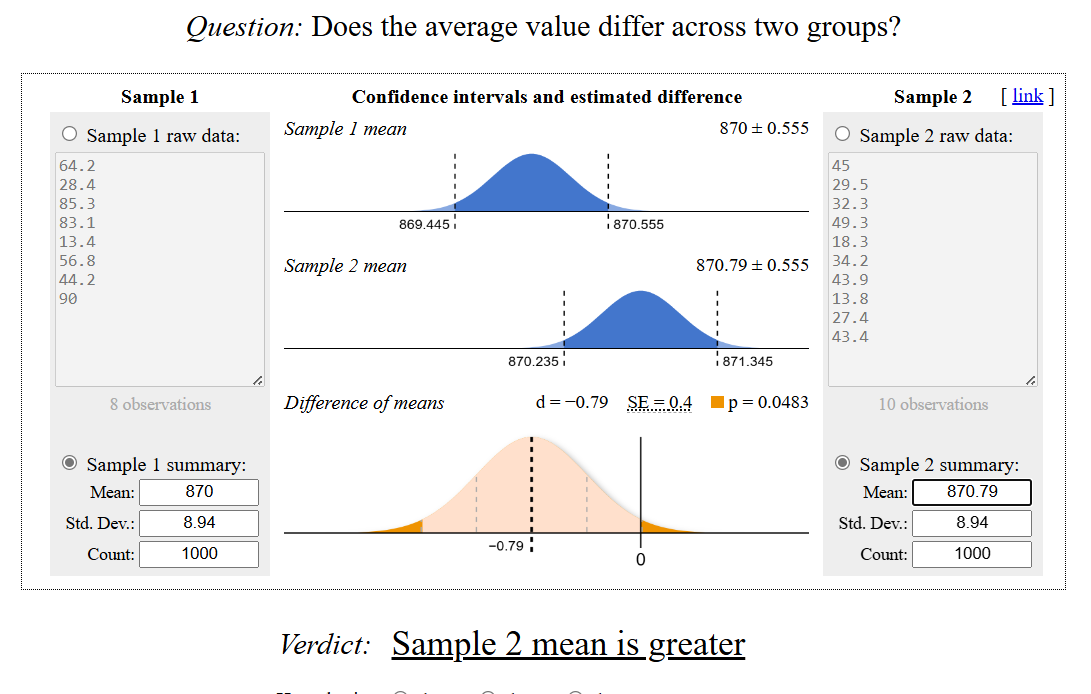

Онлайн-калькулятор указывает, что минимальная средняя сумма чека в группе В для выявления различий должна быть 870,79 руб.

In [30]:
n = 1000
mean_a = 870
d_a = 80

# sko_a = np.sqrt(d_a)

# Вычисляем Z-критическое
alpha = 0.05
t_crit = abs(sps.t.ppf(alpha/2, (n-1)))

# Для вычисления необходимого минимального различия используем метод доверительных интервалов
# (mean_b - mean_a) + t_crit * SE
# допускаем, что дисперсия по выборке А равна дисперсии по выборке В, тогда
D = d_a
SE = np.sqrt(2 * D / n)
min_mean_b = mean_a + t_crit * SE

print(f'Минимальное значение среднего чека для группы В составляет {min_mean_b: .2f} руб.')


Минимальное значение среднего чека для группы В составляет  870.78 руб.


Формульные расчеты дают минимальное значение 870,78 руб. Этот результат соответствует расчетам по онлайн-калькулятору.